[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ojasv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojasv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessed content: archiwum inżynierii produkcji production engineering archives production engineering archives issn print issn online exist since th quarter available online www processes automotive industry ewelina staniszewska dorota klimecka matevž obrecht poznan university technology faculty engineering management pl marii skłodowskiej poznań poland czestochowa university technology faculty management department production engineering safety al armii krajo wej b czestochowa poland university maribor faculty logistics mariborska celje slovenia corresponding author e article history received accepted available online abstract every year approximately million passenger cars produced automotive industry much bigger passenger cars impact automotive industry environment mendous extracting raw materials manufacturing nd assembly processes exploitation vehicle reprocessing irreversible extensive environmental damage done goal study show implementing eco processes supply chain manageme

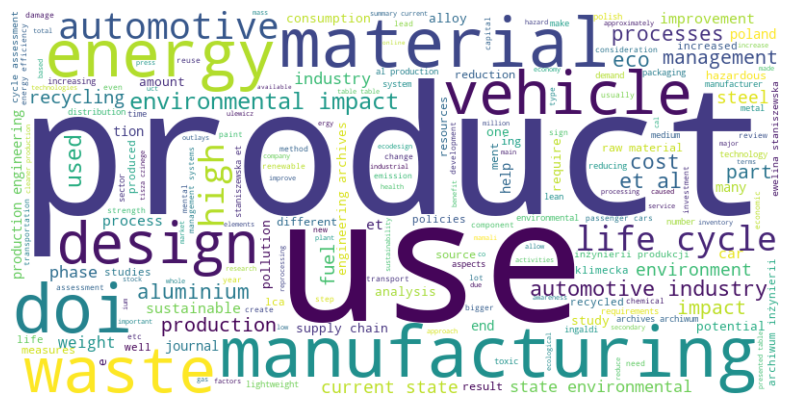

Total articles analyzed: 1
Positive articles: 1 (100.00%)
Neutral articles: 0 (0.00%)
Negative articles: 0 (0.00%)


In [5]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PyPDF2

# Downloading necessary Natural Language Toolkit (NLTK) data
nltk.download('punkt')
nltk.download('stopwords')

# Fetch articles from a website
def fetch_articles(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Print the first 1000 characters of the HTML content to inspect
    print(soup.prettify()[:1000])
    
    # Find all the divs with class 'c-article-section__content' or divs with the content to be analyzed
    content_divs = soup.find_all('div', {'class': 'c-article-section__content'})
    
    data = []
    for div in content_divs:
        paragraphs = div.find_all('p')
        for paragraph in paragraphs:
            content = paragraph.text.strip()
            data.append({'content': content})
    
    if not data:
        print("No articles found.")
    return data

# Preprocess text data
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords and non-alphabetic words
    return ' '.join(words)

# Analyze sentiment of text
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

# Summarize results
def summarize_results(articles):
    positive = sum(1 for article in articles if article['sentiment']['compound'] > 0)
    neutral = sum(1 for article in articles if article['sentiment']['compound'] == 0)
    negative = sum(1 for article in articles if article['sentiment']['compound'] < 0)
    total = len(articles)

    print(f"Total articles analyzed: {total}")
    print(f"Positive articles: {positive} ({positive / total * 100:.2f}%)")
    print(f"Neutral articles: {neutral} ({neutral / total * 100:.2f}%)")
    print(f"Negative articles: {negative} ({negative / total * 100:.2f}%)")

# Fetch and process PDF
def fetch_pdf_content(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Main function to process either URL or PDF
def main(input_source, is_pdf=False):
    articles = []
    if is_pdf:
        # Process PDF file
        pdf_text = fetch_pdf_content(input_source)
        articles.append({'content': pdf_text})
    else:
        # Process HTML URL
        articles = fetch_articles(input_source)

    # Check if articles are fetched correctly
    if not articles:
        print("No articles fetched. Please check the input source or structure.")
    else:
        # Preprocess article contents
        for article in articles:
            article['content'] = preprocess_text(article['content'])
            print(f"Preprocessed content: {article['content']}")  # Debug statement

        # Analyze sentiment of each article
        for article in articles:
            article['sentiment'] = analyze_sentiment(article['content'])
            print(f"Sentiment scores: {article['sentiment']}")  # Debug statement

        # Combine all article contents
        all_text = ' '.join([article['content'] for article in articles])
        print(f"All combined text: {all_text}")  # Debug statement

        # Generate word cloud if there is any text
        if all_text:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

            # Display word cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.show()
        else:
            print("No text available for word cloud generation.")

        # Summarize results
        summarize_results(articles)


# URL to fetch
url = 'https://link.springer.com/article/10.1007/s42398-018-0013-3'
# PDF file path 
pdf_path = 'C:/Users/ojasv/text-sentiment-analysis/src/Eco-design_processes_in_the_automotive_industry.pdf'

# Set input source and set is_pdf flag accordingly
input_source = pdf_path # url for uaing html parsing
is_pdf = True  # True for PDF and False for URl

main(input_source, is_pdf)